In [180]:
icd10CodeToText = [
    {"code":"I50","desc":"Niewydolność serca zastoinowa"},
    {"code":"I50.1","desc":"Niewydolność serca lewokomorowa"},
    {"code":"I10","desc":"Samoistne (pierwotne) nadciśnienie"},
    {"code":"J44","desc":"Inna przewlekła zaporowa choroba płuc"},
    {"code":"I25","desc":"Przewlekła choroba niedokrwienna serca"},
    {"code":"N18","desc":"rzewlekła niewydolność nerek"},
    {"code":"I49","desc":"Inne zaburzenia rytmu serca"},
    {"code":"M10","desc":"Dna moczanowa"},
    {"code":"I34.0","desc":"Niedomykalność zastawki dwudzielnej"},
    {"code":"E66","desc":"Otyłość"},
    {"code":"E11","desc":"Cukrzyca insulinoniezależna"},
    {"code":"I48","desc":"Migotanie i trzepotanie przedsionków"},
    {"code":"E78","desc":"Zaburzenia przemian lipidów i inne lipidemie"},
    {"code":"I25","desc":"Przewlekła choroba niedokrwienna serca"},
    {"code":"E79","desc":"Zaburzenia przemiany puryn i pirymidyn"},
    {"code":"F17","desc":"Zaburzenia psychiczne i zaburzenia zachowania spowodowane paleniem tytoniu"},
    {"code":"D64","desc":"Inne niedokrwistości"},
    {"code":"I21","desc":"Ostry zawał serca"},
    {"code":"I63","desc":"Zawał mózgu"},
    {"code":"I34.2","desc":"Niereumatyczne zwężenie zastawki dwudzielnej"},
    {"code":"I44.7","desc":"Blok lewej odnogi pęczka przedsionkowo-komorowego Hisa, nie określony"},
    {"code":"I35.0","desc":"Zwężenie zastawki tętnicy głównej"},
    {"code":"I08.8","desc":"Inne wady skojarzone wielu zastawek"},
    {"code":"I35.8","desc":"Inne zaburzenia funkcji zastawki tętnicy głównej"},
    {"code":"I08.0","desc":"Wady zastawek dwudzielnej i trójdzielnej"},
    {"code":"I08.1","desc":"Wady zastawek dwudzielnej i trójdzielnej"},
    {"code":"I08.3","desc":"Wady zastawek dwudzielnej i trójdzielnej"},
    {"code":"I35.8","desc":"Inne zaburzenia funkcji zastawki tętnicy głównej"},
    {"code":"I08.9","desc":"Wady wielu zastawek, nie określona"},
    {"code":"I25.2","desc":"Stary (przebyty) zawał serca"},
    {"code":"I35.2","desc":"Zwężenie zastawki tętnicy głównej z niedomykalnością"},
    {"code":"I06.9","desc":"Wada reumatyczna zastawki tętnicy głównej, nie określona"},
    {"code":"I35.1","desc":"Niedomykalność zastawki tętnicy główneja"},
    {"code":"I34.8","desc":"Inne niereumatyczne zaburzenia funkcji zastawki dwudzielnej"},
    {"code":"I34.9","desc":"Niereumatyczne zaburzenia funkcji zastawki dwudzielnej, nie określone"},
    {"code":"I35.9","desc":"Niereumatyczne zaburzenia funkcji zastawki tętnicy głównej"},
    {"code":"I06.8","desc":"Inne wady reumatyczne zastawki tętnicy głównej"},
    {"code":"I08.2","desc":"Wady zastawek tętnicy głównej i trójdzielnej"}
]

In [181]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
 
import seaborn as sns
import matplotlib.pyplot as plt

rozpoznawanieDf = pd.read_csv("../rozpoznania", sep=';')
proceduryDf = pd.read_csv("../procedury", sep=';')

print(rozpoznawanieDf.head())

######Test for dictionary of codes
# for entry in rozpoznawanieDf.rozpoznanie_icd10.unique():
#     res = next((desc for desc in icdCodeToText if desc['code'].startswith(entry)), None)
#     if res == None:
#         print(entry)

  grupa_wiekowa plec wojewodztwo_pacjenta wojewodztwo_placowki  \
0          0-18    K         dolnośląskie         dolnośląskie   
1          0-18    K            lubelskie            lubelskie   
2          0-18    K            lubelskie            lubelskie   
3          0-18    K            lubelskie            lubelskie   
4          0-18    K          mazowieckie          mazowieckie   

   znacznik_czasu rozpoznanie_icd10 typ_zdarzenia typ_platnika  \
0             281               I50        Porada    Publiczny   
1             284               I50        Porada    Publiczny   
2             285               I50        Porada    Publiczny   
3             287               I50        Porada    Publiczny   
4             288               I50        Porada    Publiczny   

  liczba_rozpoznan liczba_pacjentow  
0                5               <5  
1                5               <5  
2                5               <5  
3                5               <5  
4               

<AxesSubplot:>

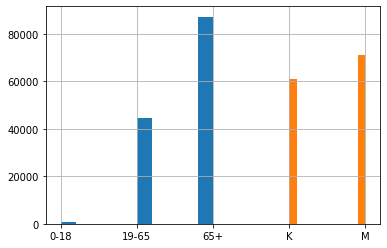

In [182]:
rozpoznawanieDf.grupa_wiekowa.hist()
rozpoznawanieDf.plec.hist()

In [183]:
rozpoznawanieDf.dropna()
rozpoznawanieDf.head()

diff = {}
for entry in rozpoznawanieDf.wojewodztwo_placowki.unique():
    if isinstance(entry, str):
        diff[entry] = 0

for index, row in rozpoznawanieDf.iterrows():
    if isinstance(row.wojewodztwo_pacjenta,str) and isinstance(row.wojewodztwo_placowki,str):
        diff[row.wojewodztwo_pacjenta] -= 1
        diff[row.wojewodztwo_placowki] += 1

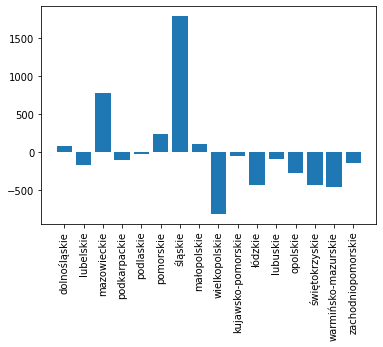

In [184]:
plt.bar(range(len(diff)), list(diff.values()), align='center')
plt.xticks(range(len(diff)), list(diff.keys()), rotation = 90)
plt.show()

Histogram ilości miejsc i obsłużonych pacjentów w danych województwach. Jeżeli jest na + to znaczy że do województwa przyjeżdżały osoby z zewnątrz na 'hospitalizację'

In [185]:
inRegionHospitalization = len(rozpoznawanieDf[rozpoznawanieDf['wojewodztwo_placowki'] == rozpoznawanieDf['wojewodztwo_pacjenta']])
notinRegionHospitalization = len(rozpoznawanieDf[rozpoznawanieDf['wojewodztwo_placowki'] != rozpoznawanieDf['wojewodztwo_pacjenta']])

print("Hospitalizowani w swoim rejonie: "+str(inRegionHospitalization))
print("Hospitalizowani NIE w swoim rejonie: "+str(notinRegionHospitalization))
print("Procentowo: "+str(round(100*inRegionHospitalization/(inRegionHospitalization+notinRegionHospitalization), 2))+"% hospitalizowanych w swoim regionie")

Hospitalizowani w swoim rejonie: 47667
Hospitalizowani NIE w swoim rejonie: 86173
Procentowo: 35.61% hospitalizowanych w swoim regionie


<AxesSubplot:>

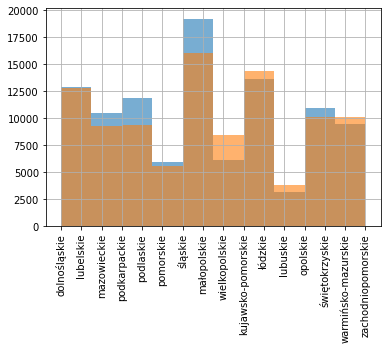

In [186]:
rozpoznawanieDf.wojewodztwo_placowki.hist(xrot=90, alpha=0.6)
rozpoznawanieDf.wojewodztwo_pacjenta.hist(xrot=90, alpha=0.6)

# Region vs wiek
### czyli nic tu nie widać

<AxesSubplot:xlabel='grupa_wiekowa', ylabel='wojewodztwo_pacjenta'>

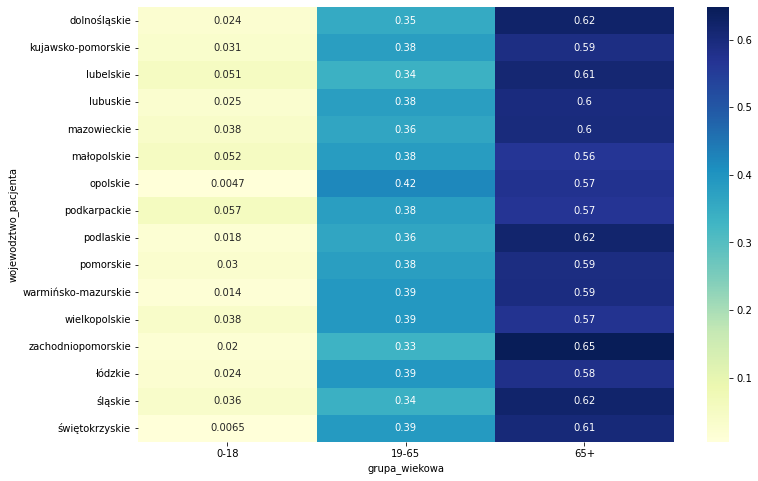

In [187]:
filtered = rozpoznawanieDf[(rozpoznawanieDf['rozpoznanie_icd10'] == "I50") | (rozpoznawanieDf['rozpoznanie_icd10'] == "I50.1")]
contigency= pd.crosstab(filtered['wojewodztwo_pacjenta'], filtered['grupa_wiekowa'], normalize='index')
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [ ]:
# wiek 